In [206]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split


## Task1

In [207]:
# Linear Regression class
class GaussianRegression:
    def __init__(self, bases,add_bias=True):
        self.add_bias = add_bias
        self.bases = bases
        self.w = None
    
    def gaussian_transformation(self,x):
        gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)  
        mus = np.linspace(0,20,self.bases)
        X = np.zeros((len(x),self.bases))
        for i, mu in enumerate(mus):
            X[:,i] = gaussian(x,mu,1)
        return X

    def fit(self, x, y):
        X = self.gaussian_transformation(x)
        if y.ndim == 1:
            y = y[:, None]
        N = X.shape[0]
        if self.add_bias:
            #X = np.column_stack([X, np.ones(N)])
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        #self.w = np.linalg.lstsq(X, y, rcond=None)[0]
        self.w = np.linalg.pinv(X.T@X)@ X.T@y
        return self
    
    def predict(self, x):
        X = self.gaussian_transformation(x)

        if self.add_bias:
            N = X.shape[0]
            #X = np.column_stack([X, np.ones(N)])
            X = np.hstack((np.ones((X.shape[0], 1)), X))

        return X @ self.w

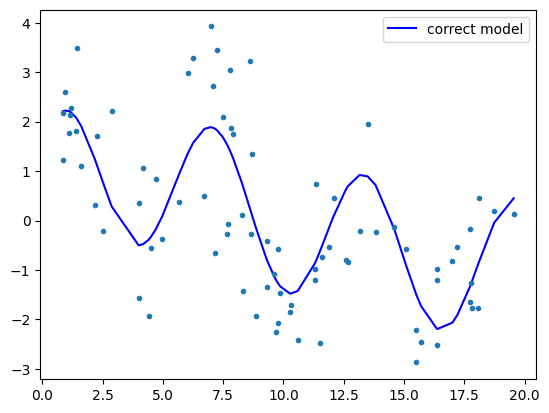

In [208]:
# Generating data

# N = 100
# X = np.linspace(0,20, N)

# y_true = np.sin(np.sqrt(X)) + np.cos(X) + np.sin(X)

# y = y_true + np.random.normal(0, 1, 100)
### aziz's code
f = lambda x: np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x)
def generate_data(n, train=0.8):
  
  train_size = int(n * train)

  x = np.random.uniform(0, 20, n)
  e = np.random.normal(0, 1, n)

  x_train = np.sort(x[: train_size])
  x_test = np.sort(x[train_size:])

  y_train = f(x_train) + e[:train_size]
  y_test = f(x_test) + e[train_size:]

  return x_train, x_test, y_train, y_test

# train_test_split 
#X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = generate_data(100)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
#y_true_train, y_true_test = train_test_split(y_true, test_size=0.2, shuffle=False)
y_true_train = f(X_train)
y_true_test = f(X_test)
plt.plot(X_train, y_true_train, 'b-', label='correct model')      
plt.plot(X_train, y_train, '.')
plt.legend()      

[np.float64(141.9915876898797), np.float64(27.56545717453861), np.float64(18.161132624458524), np.float64(20.739209201127707), np.float64(32.380118387563435), np.float64(47.430945622883506), np.float64(50.24285590232445), np.float64(50.285943367672864), np.float64(50.30518620729149), np.float64(50.34353188473402), np.float64(50.41374929918199)]
[np.float64(24.021222089964734), np.float64(7.284343208370719), np.float64(11.745848526988365), np.float64(12.369516925805558), np.float64(1921.3515808692339), np.float64(2645209.7366520083), np.float64(6927816.667118986), np.float64(7061534.939609369), np.float64(7027683.773875339), np.float64(7012640.2329347385), np.float64(6977384.94489314)]
The gaussian base with the optimal result is 10


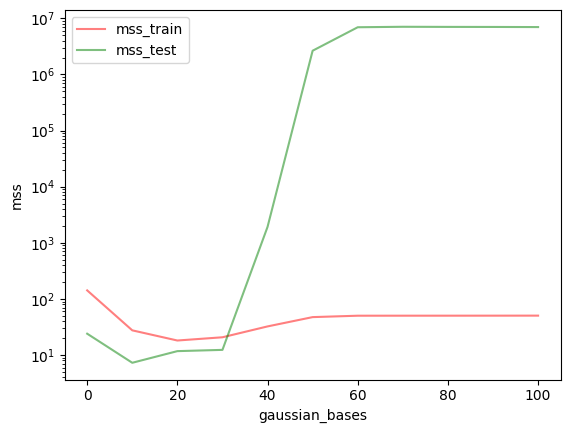

In [209]:
gaussian_bases = [0,10,20,30,40,50,60,70,80,90,100]
model_list = []
mss_train_list = []
mss_test_list = []

y_true_train = y_true_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# create model
for i,bases in enumerate(gaussian_bases):

    model = GaussianRegression(bases)

    y_train_predict = model.fit(X_train,y_train).predict(X_train)
    model_list.append(model)
    mss_train = (y_train_predict - y_true_train)**2
    mss_train_list.append(np.sum(mss_train))

    y_test_predict = model.predict(X_test)

    mss_test = (y_test_predict - y_test)**2

    mss_test_list.append(np.sum(mss_test))
print(mss_train_list)
print(mss_test_list)

min_test_value, min_i = mss_test_list[0], 0
for i in range(11):
    cur = mss_test_list[i]
    if cur < min_test_value:
        min_test_value = cur
        min_i = i

print(f'The gaussian base with the optimal result is {gaussian_bases[min_i]}')

# plot the graph
plt.plot(gaussian_bases, mss_train_list, 'r-', alpha=.5, label='mss_train')
plt.plot(gaussian_bases, mss_test_list, 'g-', alpha=.5, label='mss_test')
plt.xlabel('gaussian_bases')
plt.ylabel(r'mss')
plt.yscale('log')
plt.legend()
plt.show()

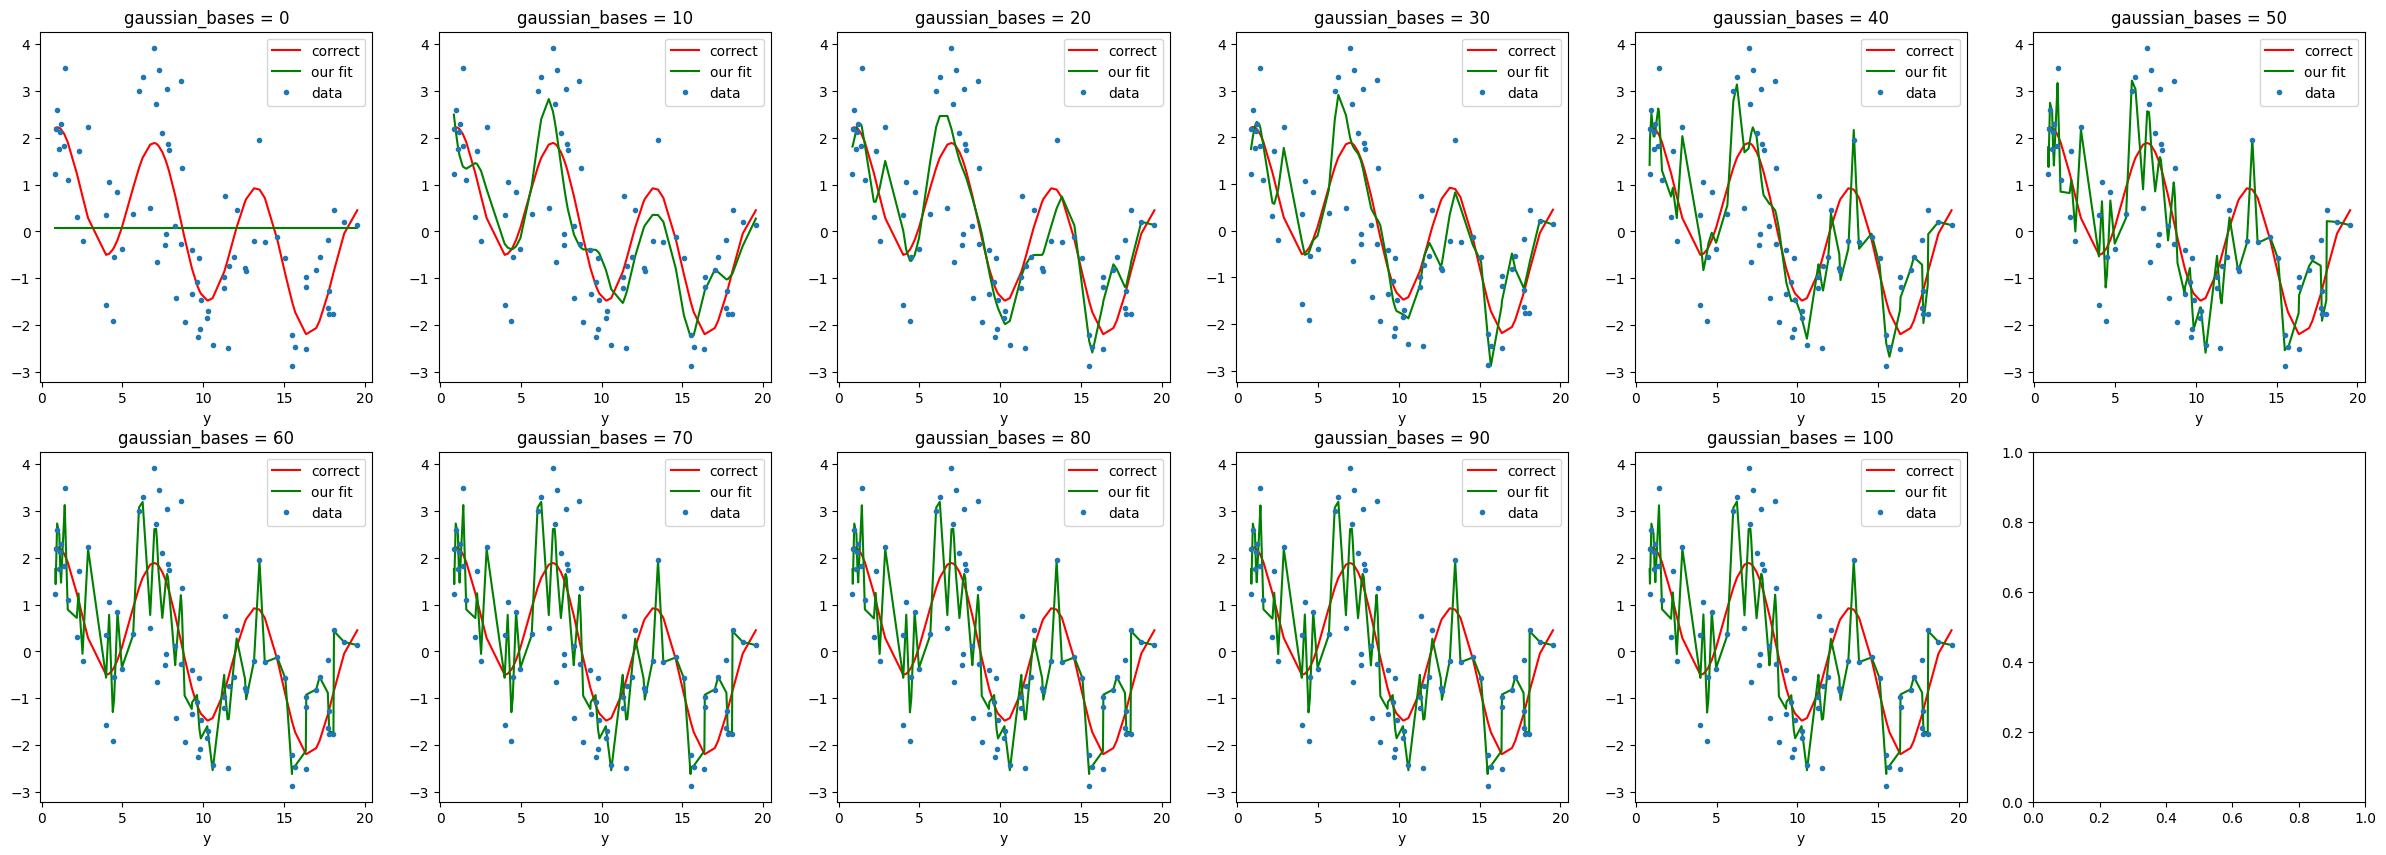

In [210]:
fig, ax = plt.subplots(2,6,figsize=(30,10))

gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)         

ax = ax.flatten()
for i in range(11):
    y_train_predict = model_list[i].fit(X_train,y_train).predict(X_train)
    ax[i].plot(X_train, y_true_train, 'r-', label='correct')      
    ax[i].plot(X_train, y_train_predict, 'g-', label='our fit')
    ax[i].plot(X_train, y_train, '.', label='data')
    ax[i].set_xlabel('x')
    ax[i].set_xlabel('y')
    ax[i].set_title(f'gaussian_bases = {gaussian_bases[i]}')
    ax[i].legend()

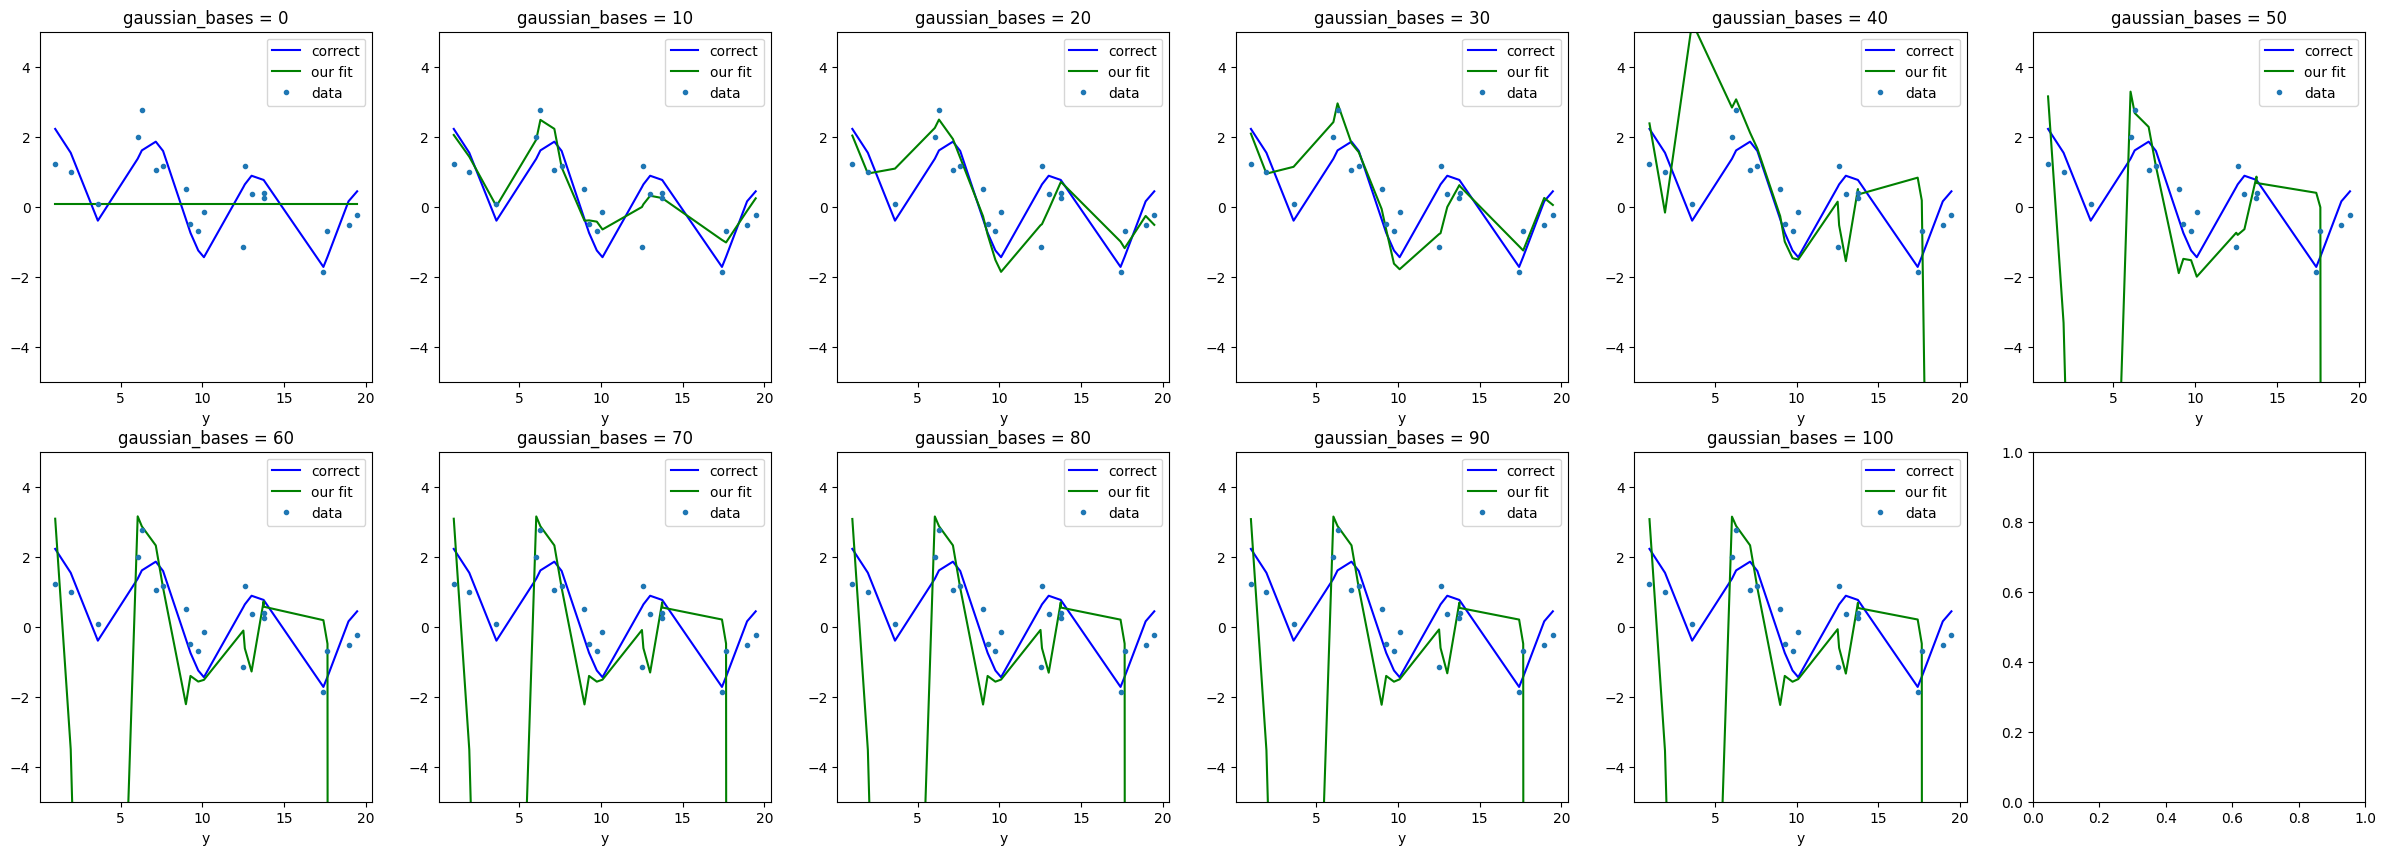

In [211]:
# the result of test data for 10 kinds of gaussian bases
fig, ax = plt.subplots(2,6,figsize=(30,10))

gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)         

ax = ax.flatten()
for i in range(11):
    y_test_predict = model_list[i].fit(X_train,y_train).predict(X_test)
    ax[i].plot(X_test, f(X_test), 'b-', label='correct')      
    ax[i].plot(X_test, y_test_predict, 'g-', label='our fit')
    ax[i].plot(X_test, y_test, '.', label='data')
    ax[i].set_xlabel('x')
    ax[i].set_xlabel('y')
    ax[i].set_title(f'gaussian_bases = {gaussian_bases[i]}')
    ax[i].legend()
    ax[i].set_ylim(-5, 5)

# Task2


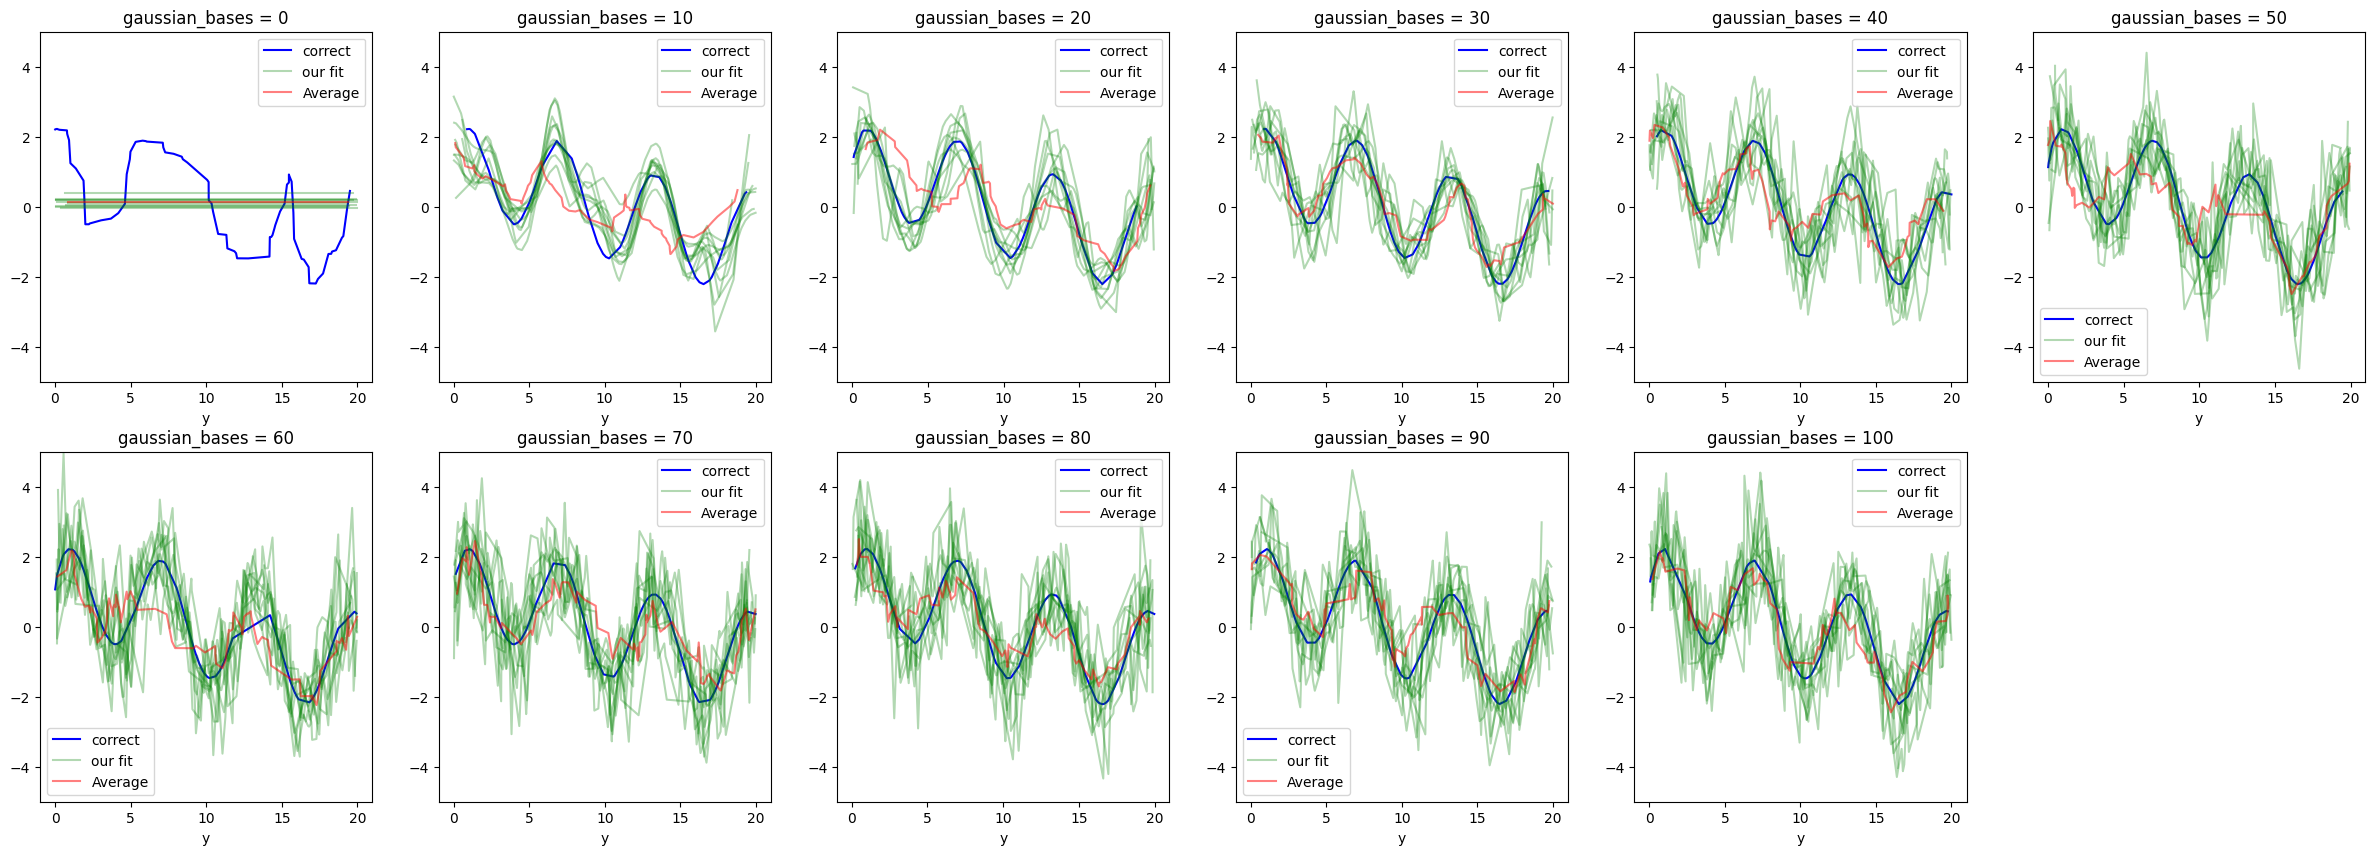

In [212]:
mss_train_list = []
mss_test_list = []

fig, ax = plt.subplots(2,6,figsize=(30,10))  

ax = ax.flatten()

X_train, X_test, y_train, y_test = generate_data(100)

for i, base in enumerate(gaussian_bases):
    sum_mss_train = 0
    sum_mss_test = 0
    ax[i].plot(X_train, y_true_train, 'b-', label='correct') 
    X_train_sum = np.zeros((80,))
    y_train_predict_sum = np.zeros((80,1))
    for j in range(10): ## generate 10 times of data
        X_train, X_test, y_train, y_test = generate_data(100)
        y_true_train = f(X_train)
        model = GaussianRegression(base)
        y_train_predict = model.fit(X_train,y_train).predict(X_train)
        mss_train = (y_train_predict - y_true_train)**2
        sum_mss_train += np.sum(mss_train)

        y_test_predict = model.predict(X_test)
        mss_test = (y_test_predict - y_test)**2
        sum_mss_test += np.sum(mss_test)
        ax[i].plot(X_train, y_train_predict, 'g-',alpha=0.3, label='our fit' if j == 0 else '')


        y_train_predict_sum += y_train_predict # calculate the average
        
    ax[i].plot(X_train, y_train_predict_sum/10, 'r-',alpha=0.5, label='Average')  # edit it

    ax[i].set_xlabel('x')
    ax[i].set_xlabel('y')
    ax[i].set_title(f'gaussian_bases = {gaussian_bases[i]}')
    ax[i].legend()
    ax[i].set_ylim(-5, 5)

    sum_mss_train = sum_mss_train/10
    sum_mss_test = sum_mss_test/10
    mss_train_list.append(sum_mss_train)
    mss_test_list.append(sum_mss_test)
ax[11].set_visible(False)




The gaussian base with the optimal result is 0


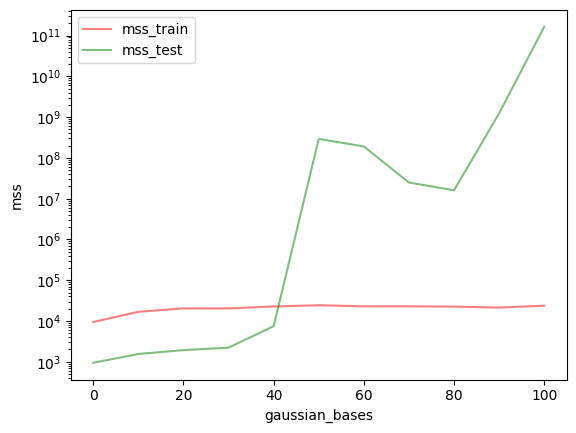

In [213]:
min_test_value, min_i = mss_test_list[0], 0
for i in range(11):
    cur = mss_test_list[i]
    if cur < min_test_value:
        min_test_value = cur
        min_i = i

print(f'The gaussian base with the optimal result is {gaussian_bases[min_i]}')
# plot the graph
plt.plot(gaussian_bases, mss_train_list, 'r-', alpha=0.5, label='mss_train' )
plt.plot(gaussian_bases, mss_test_list, 'g-', alpha=0.5, label='mss_test')
plt.xlabel('gaussian_bases')
plt.ylabel(r'mss')
plt.yscale('log')
plt.legend()
plt.show()

# Task 3

In [221]:
# Linear Regression class with regularization
class Gaussian_Regression_Regularization:
    def __init__(self, bases, regularization_type,  reg_lamda, max_iter=1e5, alpha=1e-3,  add_bias=True , epsilon=5e-2):
        self.add_bias = add_bias
        self.bases = bases
        self.regularization_type = regularization_type
        self.reg_lamda = reg_lamda
        self.w = None
        self.alpha = alpha
        self.max_iter = max_iter
        self.epsilon = epsilon
    
    def gaussian_transformation(self,x):
        gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)  
        mus = np.linspace(0,20,self.bases)
        X = np.zeros((len(x),self.bases))
        for i, mu in enumerate(mus):
            X[:,i] = gaussian(x,mu,1)
        return X

    def fit(self, x, y):
        X = self.gaussian_transformation(x)
        if y.ndim == 1:
            y = y[:, None]
        N = X.shape[0]
        if self.add_bias:
            #X = np.column_stack([X, np.ones(N)])
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        #self.w = np.linalg.lstsq(X, y, rcond=None)[0]
        I = np.eye(X.shape[1])
        if self.regularization_type == 'ridge':
            self.w = np.linalg.pinv(X.T@X + I * self.reg_lamda)@ X.T@y 
        elif self.regularization_type == 'lasso':
            w = np.zeros((X.shape[1],1))
            N, D = X.shape
            e = np.inf
            i = 0 
            while i < self.max_iter and e > self.epsilon:
                gradient = 1/N* X.T@(X@w - y) + self.reg_lamda * np.sign(w)
                w = w - self.alpha * gradient
                e = np.linalg.norm(gradient)
                i += 1
            self.w = w
            
        return self
    
    # def lasso():
    #     return self
    def predict(self, x):
        X = self.gaussian_transformation(x)

        if self.add_bias:
            N = X.shape[0]
            #X = np.column_stack([X, np.ones(N)])
            X = np.hstack((np.ones((X.shape[0], 1)), X))

        return X @ self.w

L2 regression

In [230]:
# cross validation
def cross_val_10fold(model, X, y, num_folds=10, learning_rate=0.01, num_iterations=1000):
    
    # Shuffle data
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Split data into folds
    fold_size = len(X) // num_folds
    mse_scores = []

    for fold in range(num_folds):
        # Create train and test sets
        start = fold * fold_size
        end = start + fold_size
        X_test = X[start:end]
        y_test = y[start:end]
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate mean squared error
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)

    # Calculate average MSE
    average_mse = np.mean(mse_scores)
    return average_mse, mse_scores

regularizations = np.logspace(-4,2, 15)

diff_reg_avg_mse = []
for i, reg in enumerate(regularizations):
    l2_model = Gaussian_Regression_Regularization(bases = 70, reg_lamda=reg, regularization_type='ridge')
    average_mse, mse_scores = cross_val_10fold(model = l2_model, X = X, y = y)
    diff_reg_avg_mse.append(average_mse)

print(diff_reg_avg_mse)


[np.float64(4.207913365201609), np.float64(4.3808780052329706), np.float64(4.343467772145359), np.float64(4.213143681014968), np.float64(4.138369574030517), np.float64(3.913003820548469), np.float64(3.660562808794194), np.float64(4.321485689981775), np.float64(4.145338065018276), np.float64(4.029931555708744), np.float64(3.990161780247959), np.float64(3.6414756320077246), np.float64(3.233646940802396), np.float64(2.9112851957823174), np.float64(2.6901654359875535)]
